In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data=pd.read_csv(city_data_to_load)

ride_data=pd.read_csv(ride_data_to_load)


x=ride_data.groupby(['city'])["fare"].agg([('AvgFare','mean'),("Total_ride","count")])

x=x.reset_index(None)

# Combine the data into a single dataset

combined_ride = pd.merge(city_data, x, how='outer', on='city')


# Display the data table for preview
combined_ride.head()


,city,driver_count,type,AvgFare,Total_ride
0,Richardfort,38,Urban,22.373214,28
1,Williamsstad,59,Urban,24.362174,23
2,Port Angela,67,Urban,23.836842,19
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,25.123871,31


## Bubble Plot of Ride Sharing Data
The Graph shows that people do use more  rides "urban" area and the ride count reduces drastically for rular area. The interesting fact is avg fare is qite high in rular area is higher that means people uses rides if only they hav to go some place far.

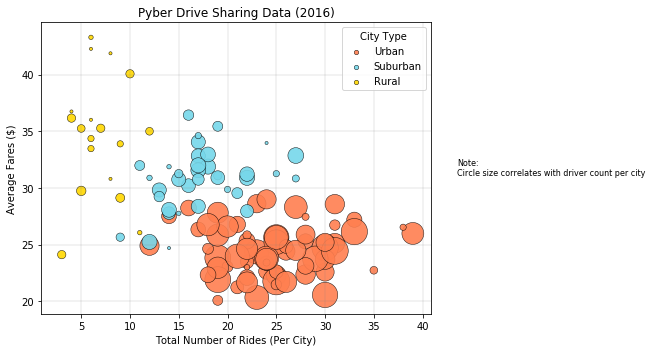

In [5]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

x  = combined_ride["Total_ride"]
y  = combined_ride["AvgFare"]
s  = combined_ride["driver_count"] * 10
ct = combined_ride["type"]
unique_city_type = ct.unique()
ct_colors ={"Urban":"#FF7F50", "Suburban":"#76D7EA","Rural":"#FFD700"}
fig, ax = plt.subplots(figsize=(8,5))
for i, city_type in enumerate(unique_city_type):
    xi = [x[j] for j  in range(len(x)) if ct[j] == city_type]
    yi = [y[j] for j  in range(len(x)) if ct[j] == city_type]
    si = [s[j] for j  in range(len(x)) if ct[j] == city_type]
    plt.scatter(x=xi, y=yi, s=si, c=ct_colors[city_type], label=str(city_type), linewidths=0.5, edgecolors="black",alpha=0.9)
lgnd = plt.legend(frameon=True,title="City Type",loc="upper right")
for handle in lgnd.legendHandles:
    handle.set_sizes([20])

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
ax.set_title('Pyber Drive Sharing Data (2016)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fares ($)')
note = f"Note:\nCircle size correlates with driver count per city"
plt.text(0.8, 0.5, note, fontsize=8, transform=plt.gcf().transFigure)
plt.tight_layout()
plt.show()



## Total Fares by City Type: 
The maximum revenue for Phyber company is coming from "Urban" areas

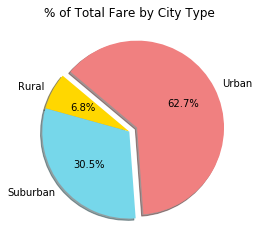

In [6]:
# Calculate Type Percents

Total_Type=pd.merge(city_data, ride_data, how='outer', on='city')

Total_Type=(Total_Type.groupby(['type']).agg({'fare':'sum'})/Total_Type['fare'].sum() *100).reset_index(None)

color =["#FFD700","#76D7EA","#F08080"]

explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

pieplt=plt.pie(Total_Type['fare'],explode=explode,labels=Total_Type['type'],autopct="%.1f%%",\
               shadow=True,startangle=140,colors=color)

plt.title("% of Total Fare by City Type")
plt.grid()
plt.show()


In [ ]:

#The More rides are taken "urban" ares than in Rular  that shows a trend that more people uses the ride services in "Urban Areas"

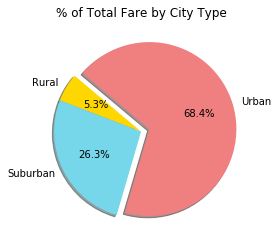

In [7]:
# Calculate Ride Percents

Total_Type=pd.merge(city_data, ride_data, how='outer', on='city')

Total_Type.fillna(0)

Total_Type=(Total_Type.groupby(['type']).agg({'ride_id':'count'})/Total_Type['ride_id'].count() *100).reset_index(None)

color =["#FFD700","#76D7EA","#F08080"]

explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

pieplt=plt.pie(Total_Type['ride_id'],explode=explode,labels=Total_Type['type'],autopct="%.1f%%",\
               shadow=True,startangle=140,colors=color)

plt.title("% of Total Fare by City Type")
plt.grid()
plt.show()


## Total Drivers by City Type
More drivers are opting to provide there services in "Urban" area 

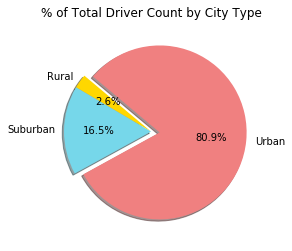

In [8]:
# Calculate Driver Percents


Total_Type=pd.merge(city_data, ride_data, how='outer', on='city')

Total_Type.fillna(0)

Total_Type=(combined_ride.groupby(['type']).agg({'driver_count':'sum'})/combined_ride['driver_count'].sum() *100).reset_index(None)


color =["#FFD700","#76D7EA","#F08080"]

explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

pieplt=plt.pie(Total_Type['driver_count'],explode=explode,labels=Total_Type['type'],autopct="%.1f%%",\
               shadow=True,startangle=140,colors=color)

plt.title("% of Total Driver Count by City Type")
plt.grid()
plt.show()
